In [1]:
import tensorflow as tf
import numpy as np
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()

train_images = tf.reshape(train_images, [60000, 28 * 28])
train_images = tf.cast(train_images, "float32") / 255

test_images = train_images[:10000]
train_images = train_images[10000:]

In [2]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(784)
])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mse"])

In [3]:
history = model.fit(
    train_images, train_images,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0510 - mse: 0.0510 - val_loss: 0.0322 - val_mse: 0.0322
Epoch 2/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0346 - mse: 0.0346 - val_loss: 0.0255 - val_mse: 0.0255
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0310 - mse: 0.0310 - val_loss: 0.0236 - val_mse: 0.0236
Epoch 4/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0214 - val_mse: 0.0214
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0193 - val_mse: 0.0193
Epoch 6/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0264 - mse: 0.0264 - val_loss: 0.0190 - val_mse: 0.0190
Epoch 8/20
313/313 [==============================] - 3s 8ms/step - loss: 0.

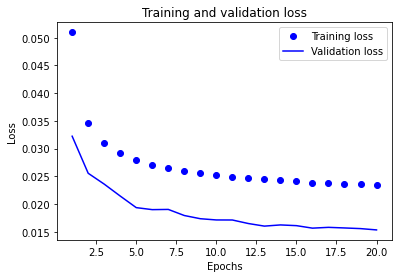

In [4]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [5]:
predictions = model.predict(test_images, batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [6]:
predictions.shape

(10000, 784)

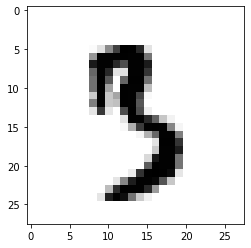

In [31]:
import tensorflow as tf
import matplotlib.pyplot as plt

#141

digit = tf.reshape(test_images[1378], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('plain_test_images_1378.png', bbox_inches='tight')

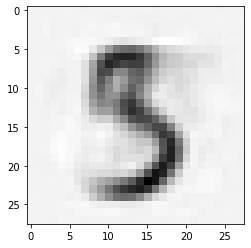

In [32]:
digit = tf.reshape(predictions[1378], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('plain_predictions_1378.png', bbox_inches='tight')